In [35]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [36]:
data=pd.read_excel("C:/Users/2261092/Downloads/compactiv.xlsx")

In [37]:
data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [38]:
data.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [4]:
print("The dataset have {} number of rows and {} number of columns.".format(data.shape[0],data.shape[1]))

The dataset have 8192 number of rows and 22 number of columns.


In [5]:
data.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [6]:
data.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [10]:
### Finding out unique values in column having null values.

In [11]:
for col in data.columns:
    print("{}:{}".format(col,data[col].unique()))

lread:[   1    0   15    5   21    4    6   25    3   11   17   56   18    2
   13   10   16   19    8   50   14   51  156   36   20    7   46  184
   33   12   53   95   37   42   81  145   26   23    9   30   78   82
  104  141   64   29   62   31   65   47   22   41   77  119  139   28
   24   35   70   40   66  670   43   52  285   44   27  553  162   57
   34   86   45  123   55  105   39   72   54  222  169   49   48   38
  100   59   32  393  796   68   83   87   99  117  225  175  155  228
   61  213   90   92  187   97  136   60  198  137  219   96  182   69
  160   80  172  133   88  106   74  188  114  193  179   94  405   85
  173  163  194  189   79  190  101  217  112  230  165  515   71 1845
  168  421   58   63  170   84  499  912  755  191  235  246   93   67
   73   98  164  158   75  171  622  132  121   89  254  223  177  753
  277   76  208  110  130  120  157  131  825  124  116  299  596  111
  181  378  252  644  148  335  125  122  199  183  680  207  152  462


In [12]:
data.rchar.unique()

array([ 40671.,    448.,     nan, ..., 325948.,  62571., 111111.])

In [13]:
data.wchar.unique()

array([53995.,  8385., 31950., ..., 85282., 29505., 22256.])

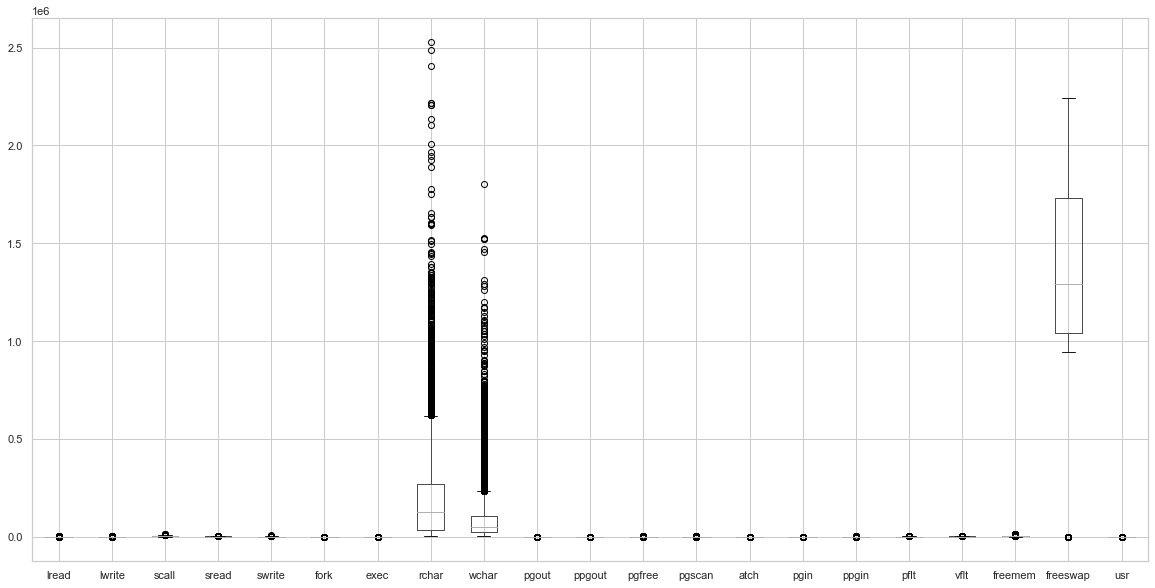

In [18]:
plt.figure(figsize=(20,10))
boxplot=data.boxplot()

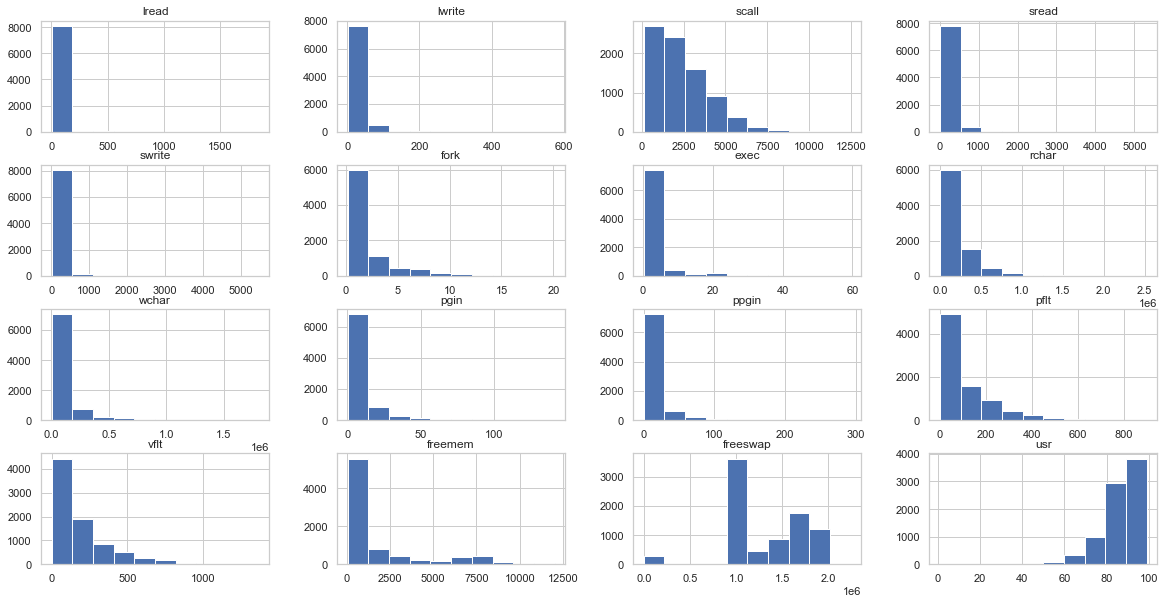

In [38]:
### Univariate analysis
data.hist(figsize=(20,10))
plt.show()

<Figure size 1440x720 with 0 Axes>

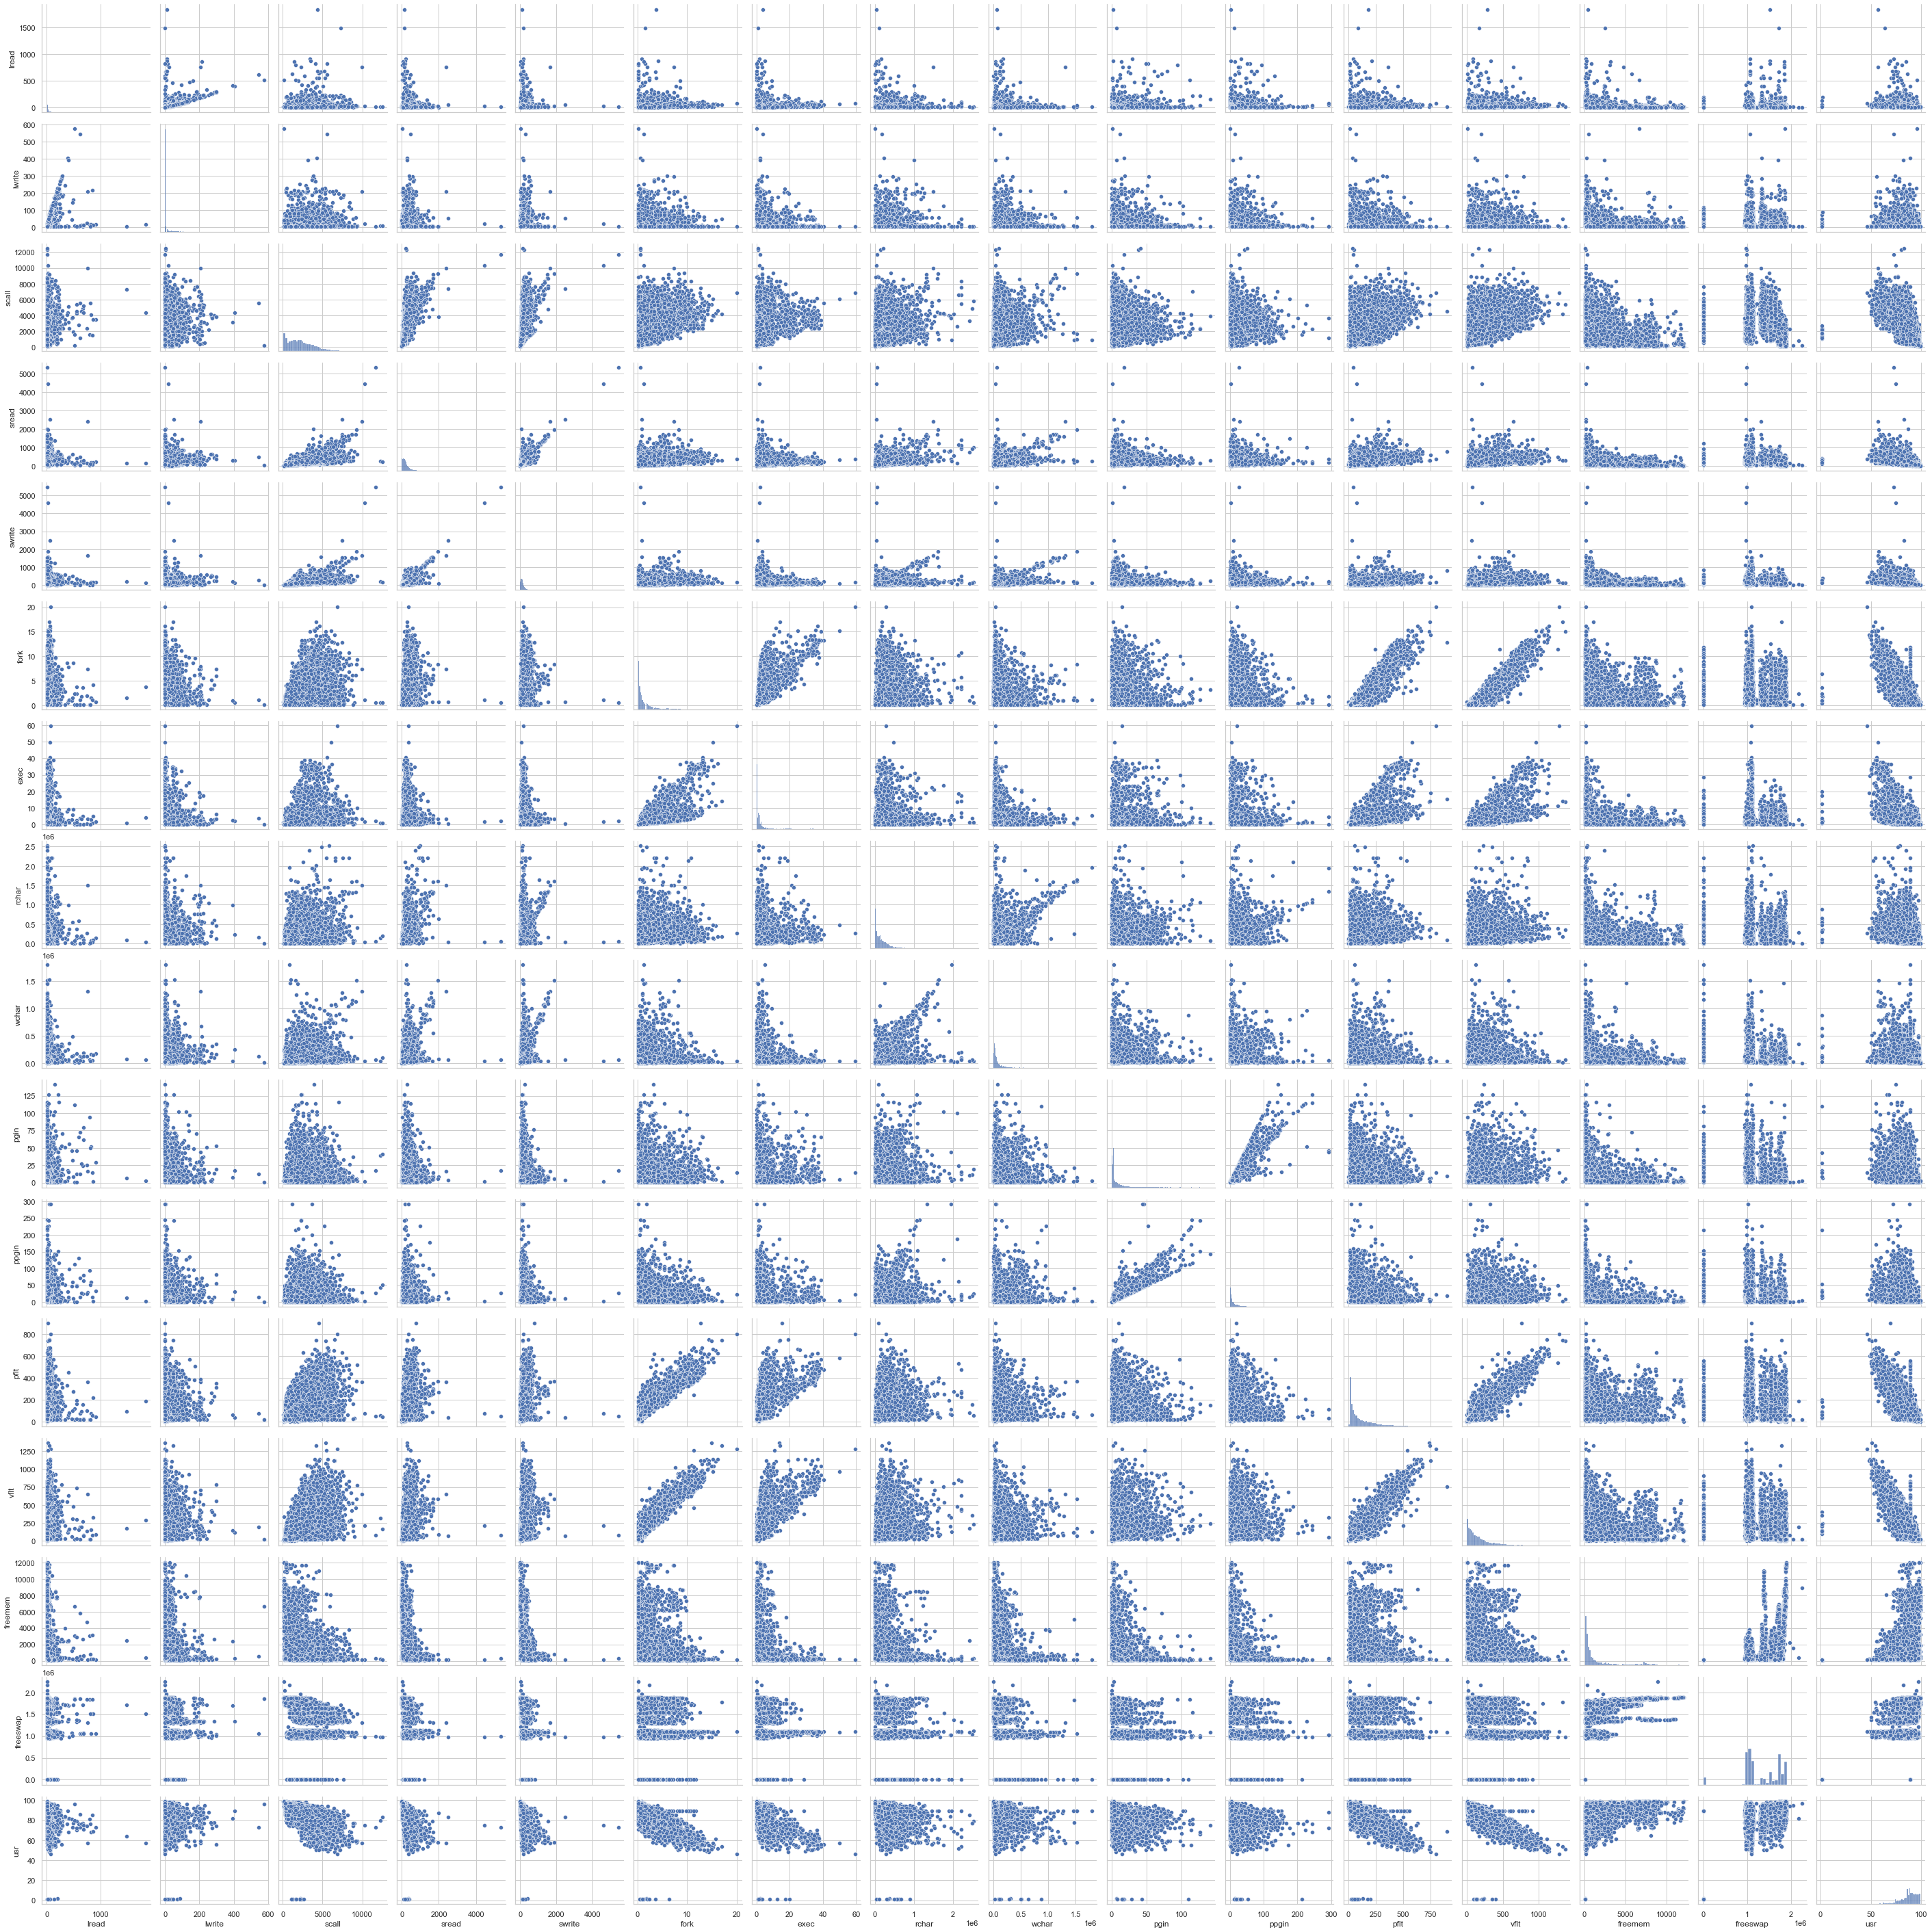

In [39]:
### Bivariate analysis
plt.figure(figsize=(20,10))
sns.pairplot(data)

C:\Users\2261092\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CPU run in usr mode vs rchar'}, xlabel='usr', ylabel='rchar'>

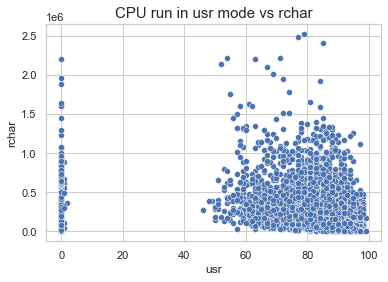

In [44]:
plt.title("CPU run in usr mode vs rchar", fontsize=15)
sns.scatterplot(data.usr, data.rchar)

In [40]:
### Multivariate analysis
data.corr()

lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.530386  0.183427  0.126584  0.114870  0.133405   
lwrite    0.530386  1.000000  0.141395  0.126944  0.100594  0.051009   
scall     0.183427  0.141395  1.000000  0.696887  0.619984  0.446353   
sread     0.126584  0.126944  0.696887  1.000000  0.881069  0.416407   
swrite    0.114870  0.100594  0.619984  0.881069  1.000000  0.376697   
fork      0.133405  0.051009  0.446353  0.416407  0.376697  1.000000   
exec      0.106007  0.037071  0.308564  0.163740  0.103371  0.763830   
rchar     0.102754  0.112933  0.349148  0.499998  0.330156  0.279310   
wchar     0.077941  0.089894  0.273796  0.401427  0.393929  0.060848   
pgin      0.181911  0.084688  0.221049  0.192784  0.135587  0.154433   
ppgin     0.153721  0.083517  0.201275  0.198128  0.134523  0.124070   
pflt      0.129323  0.065199  0.481594  0.451896  0.396476  0.930780   
vflt      0.157289  0.093053  0.531760  0.491045  0.416571  0.939091   
freemem  -0.078541 -0.091359 -0.387520 -0.286437 -0.248574 -0.122885   
freeswap -0.073074 -0.114367 -0.350629 -0.302036 -0.237062 -0.130080   
usr      -0.242774 -0.153589 -0.666459 -0.570226 -0.500499 -0.753746   

              exec     rchar     wchar      pgin     ppgin      pflt  \
lread     0.106007  0.102754  0.077941  0.181911  0.153721  0.129323   
lwrite    0.037071  0.112933  0.089894  0.084688  0.083517  0.065199   
scall     0.308564  0.349148  0.273796  0.221049  0.201275  0.481594   
sread     0.163740  0.499998  0.401427  0.192784  0.198128  0.451896   
swrite    0.103371  0.330156  0.393929  0.135587  0.134523  0.396476   
fork      0.763830  0.279310  0.060848  0.154433  0.124070  0.930780   
exec      1.000000  0.167353  0.000565  0.176818  0.141507  0.644881   
rchar     0.167353  1.000000  0.499569  0.290431  0.339971  0.311515   
wchar     0.000565  0.499569  1.000000  0.169585  0.193971  0.086081   
pgin      0.176818  0.290431  0.169585  1.000000  0.921586  0.163804   
ppgin     0.141507  0.339971  0.193971  0.921586  1.000000  0.139527   
pflt      0.644881  0.311515  0.086081  0.163804  0.139527  1.000000   
vflt      0.691406  0.362042  0.111078  0.290071  0.251733  0.935302   
freemem  -0.158228 -0.148509 -0.148928 -0.201577 -0.190356 -0.112497   
freeswap -0.153084 -0.218712 -0.225880 -0.252756 -0.231378 -0.130387   
usr      -0.616583 -0.428204 -0.269134 -0.384285 -0.365192 -0.762162   

              vflt   freemem  freeswap       usr  
lread     0.157289 -0.078541 -0.073074 -0.242774  
lwrite    0.093053 -0.091359 -0.114367 -0.153589  
scall     0.531760 -0.387520 -0.350629 -0.666459  
sread     0.491045 -0.286437 -0.302036 -0.570226  
swrite    0.416571 -0.248574 -0.237062 -0.500499  
fork      0.939091 -0.122885 -0.130080 -0.753746  
exec      0.691406 -0.158228 -0.153084 -0.616583  
rchar     0.362042 -0.148509 -0.218712 -0.428204  
wchar     0.111078 -0.148928 -0.225880 -0.269134  
pgin      0.290071 -0.201577 -0.252756 -0.384285  
ppgin     0.251733 -0.190356 -0.231378 -0.365192  
pflt      0.935302 -0.112497 -0.130387 -0.762162  
vflt      1.000000 -0.201790 -0.245384 -0.814862  
freemem  -0.201790  1.000000  0.572632  0.311547  
freeswap -0.245384  0.572632  1.000000  0.302137  
usr      -0.814862  0.311547  0.302137  1.000000

<AxesSubplot:>

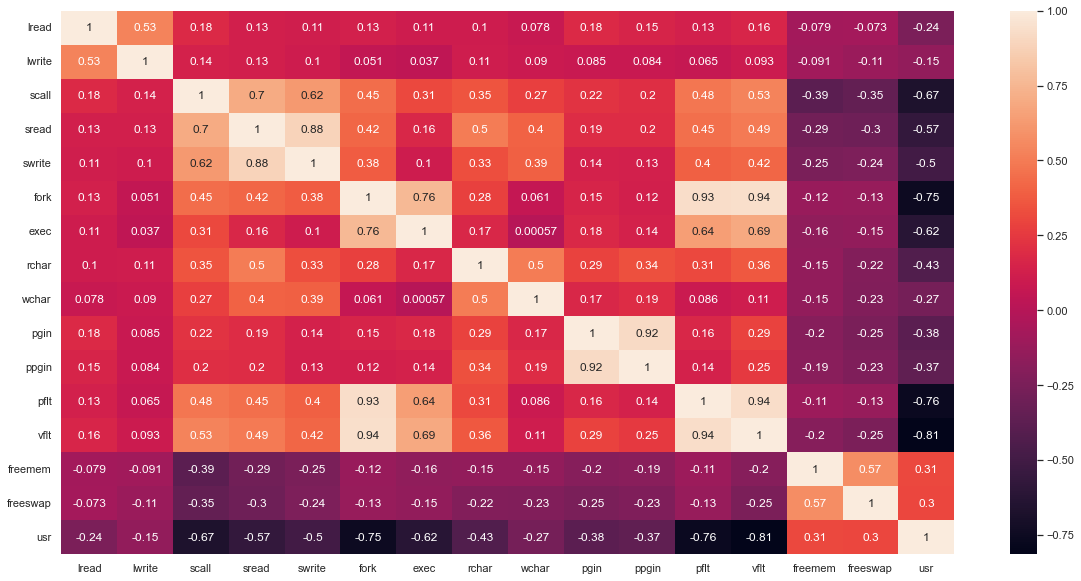

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
sns.barplot(data.usr, data.freeswap, data.freemem)

C:\Users\2261092\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### insights
1. There are 22 column of variables in the dataset and 8192 rows.
2. There are no duplicate values in all the columns.
3. There is only one categorical variable runqsz in the dataset.
4. Outliers are present in the all variable. 
5. There are null values present in the column rchar and wchar. 
6. Dependent variable is usr.

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [5]:
median1 = data.rchar.median()
data.rchar = data.rchar.replace(np.nan, median1)
median2 = data.wchar.median()
data.wchar = data.wchar.replace(np.nan, median2)

In [15]:
data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [16]:
(data==0).sum()

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

In [6]:
data.drop(["pgout","ppgout","pgfree","pgscan","atch"], axis=1, inplace=True)

In [7]:
data.replace(to_replace=0, value=data.median(), inplace=True)

C:\Users\2261092\AppData\Local\Temp\ipykernel_12500\3831448703.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.replace(to_replace=0, value=data.median(), inplace=True)


In [19]:
(data==0).sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [8]:
data_num=data.select_dtypes(include=["float64", "int64"])

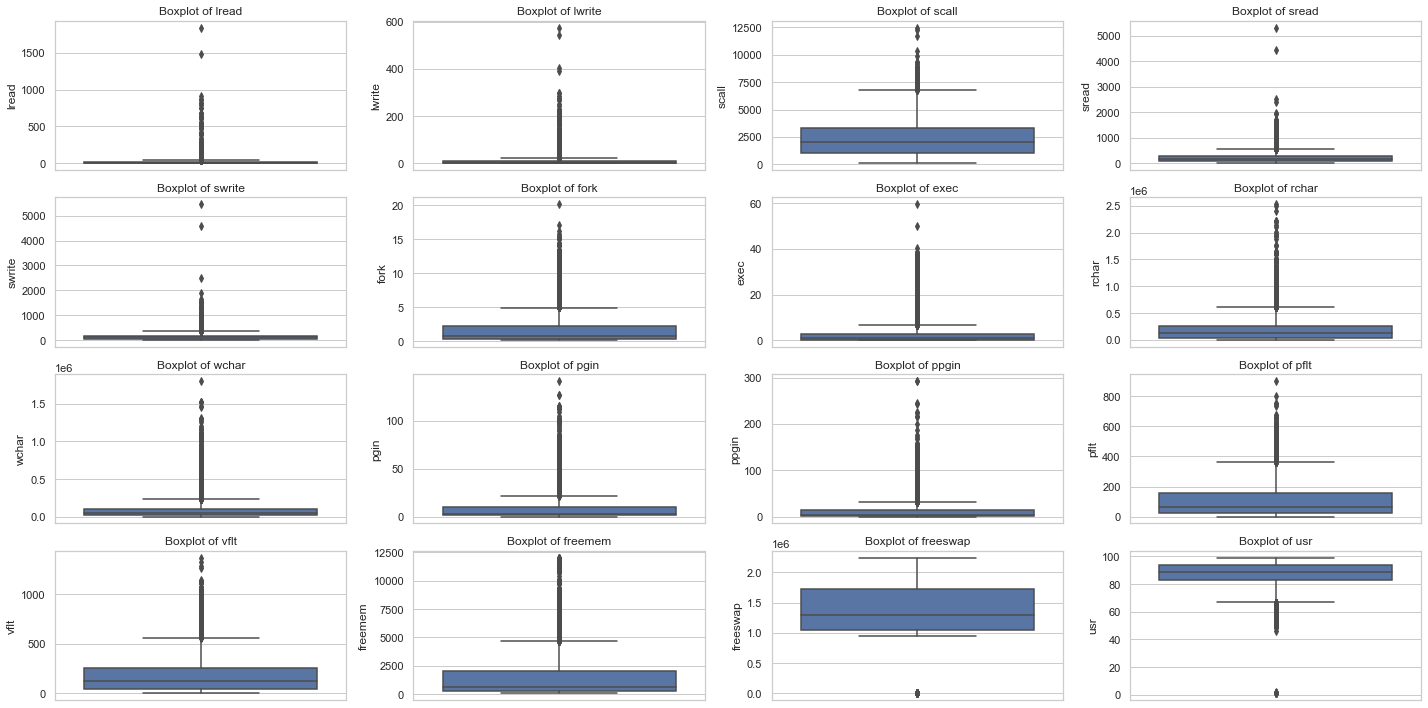

In [9]:
plt.figure(figsize=(20,10))
feature_list=data_num.columns
for i in range (len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=data_num[feature_list[i]], data=data_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [10]:
### Treating outliers. Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [11]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    ll, ul = remove_outlier(data_num[i])
    data_num[i] = np.where(data_num[i] > ul, ul, data_num[i])
    data_num[i] = np.where(data_num[i] < ll, ll, data_num[i])

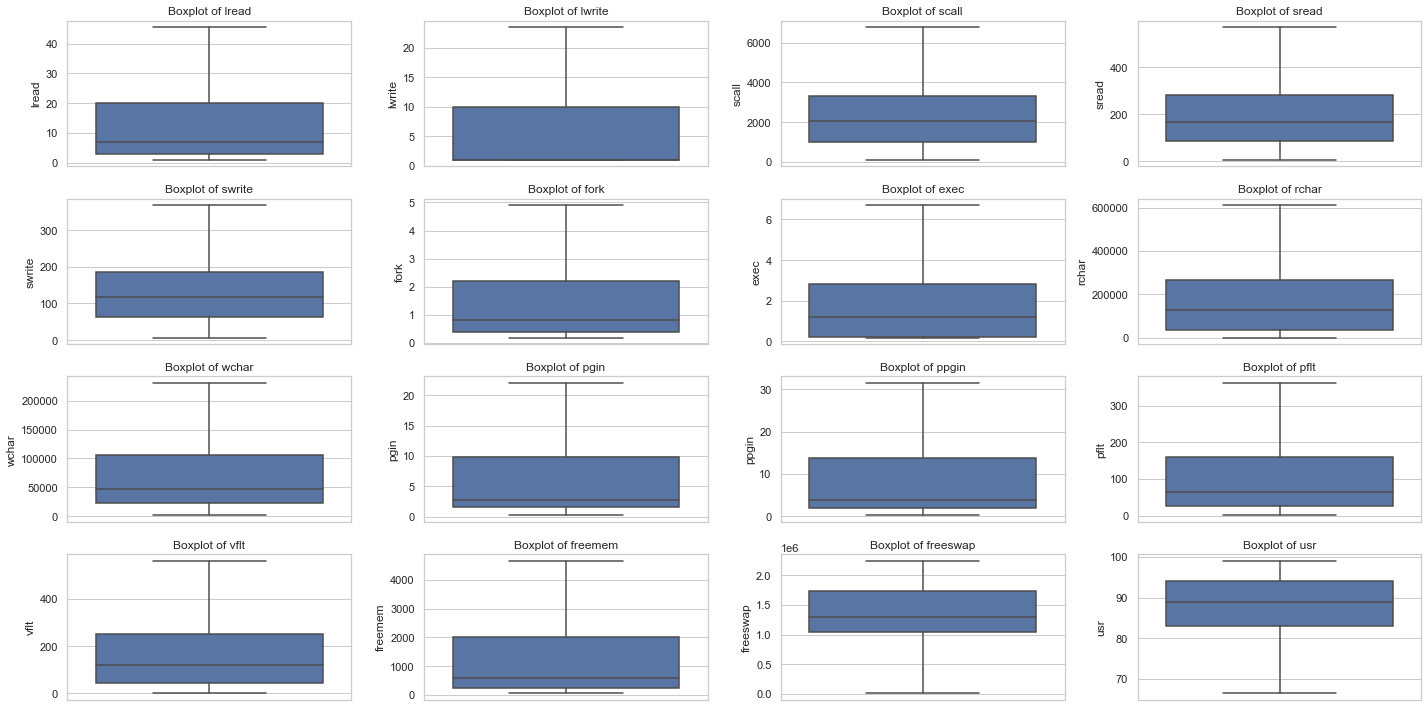

In [29]:
plt.figure(figsize=(20,10))
feature_list=data_num.columns
for i in range (len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=data_num[feature_list[i]], data=data_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [37]:
dups=data.duplicated().sum()
print("There are {} duplicates in the dataset.".format(dups))

There are 0 duplicates in the dataset.


In [13]:
### insights
#1. The column varible pgout, ppgout, pgfree, pgscan, atch have more than 50%, 0 values so we drop the column.
#2. The remaning column having 0 values, we replace it with median value of the column.
#3. We treated the null values with the median values.
#4. There are outliers present in the every column so it is neccessary to treat them all.
#5. Have checked the collinearity among all the variable using pairplot, done univariate analysis to analyse each and every column and done multivariate analysis usig heatmap.

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [14]:
data = pd.get_dummies(data, columns=["runqsz"], drop_first=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgin                  8192 non-null   float64
 10  ppgin                 8192 non-null   float64
 11  pflt                  8192 non-null   float64
 12  vflt                  8192 non-null   float64
 13  freemem               8192 non-null   int64  
 14  freeswap              8192 non-null   int64  
 15  usr                  

In [15]:
### Train-test split
data_df=data.copy()

In [16]:
# Copy the predictor variable into dataframe.
X=data_df.drop(["usr"],axis=1)

# Copy target into y dataframe
y=data_df[["usr"]]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [18]:
### Linear Regression Model
from sklearn.linear_model import LinearRegression

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [20]:
for idx, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[0][idx]))

The coefficient for lread is -0.011900566545768654
The coefficient for lwrite is -0.0023821393568151206
The coefficient for scall is -0.0014051923741018773
The coefficient for sread is 0.0006411282096692113
The coefficient for swrite is -0.003931752249884447
The coefficient for fork is 0.2043696725745215
The coefficient for exec is -0.3241911778899859
The coefficient for rchar is -1.196513414988441e-06
The coefficient for wchar is -5.135969681179832e-06
The coefficient for pgin is -0.013921553275935333
The coefficient for ppgin is -0.05295469120861869
The coefficient for pflt is -0.017642650641656817
The coefficient for vflt is -0.015474555520647732
The coefficient for freemem is 0.0002126116368606702
The coefficient for freeswap is -3.6692520047972195e-07
The coefficient for runqsz_Not_CPU_Bound is -0.12111793824531517


In [21]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 98.04063083065783


In [22]:
regression_model.score(X_train, y_train)

0.7990928753603384

In [23]:
regression_model.score(X_test, y_test)

0.7817552563251351

In [24]:
from sklearn import metrics

In [25]:
predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

4.202461580650133

In [26]:
### linear regression using statsmodel(ols)
import statsmodels.api as sm

In [27]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [28]:
model = sm.OLS(y_train, X_train).fit()

In [68]:
model

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:44:45   Log-Likelihood:                -16397.
No. Observations:                5734   AIC:                         3.283e+04
Df Residuals:                    5717   BIC:                         3.294e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   98.0406      0.288    340.806      0.000      97.477      98.605
lread                   -0.0119      0.001     -9.628      0.000      -0.014      -0.009
lwrite                  -0.0024      0.002     -1.009      0.313      -0.007       0.002
scall                   -0.0014   5.26e-05    -26.695      0.000      -0.002      -0.001
sread                    0.0006      0.001      0.901      0.367      -0.001       0.002
swrite                  -0.0039      0.001     -5.035      0.000      -0.005      -0.002
fork                     0.2044      0.094      2.185      0.029       0.021       0.388
exec                    -0.3242      0.019    -17.451      0.000      -0.361      -0.288
rchar                -1.197e-06   3.23e-07     -3.709      0.000   -1.83e-06   -5.64e-07
wchar                -5.136e-06   4.91e-07    -10.453      0.000    -6.1e-06   -4.17e-06
pgin                    -0.0139      0.011     -1.231      0.218      -0.036       0.008
ppgin                   -0.0530      0.007     -7.685      0.000      -0.066      -0.039
pflt                    -0.0176      0.002    -10.622      0.000      -0.021      -0.014
vflt                    -0.0155      0.001    -12.458      0.000      -0.018      -0.013
freemem                  0.0002   2.91e-05      7.319      0.000       0.000       0.000
freeswap             -3.669e-07   1.76e-07     -2.090      0.037   -7.11e-07   -2.27e-08
runqsz_Not_CPU_Bound    -0.1211      0.118     -1.025      0.306      -0.353       0.111
==============================================================================
Omnibus:                     9057.361   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9167845.549
Skew:                          -9.883   Prob(JB):                         0.00
Kurtosis:                     197.889   Cond. No.                     7.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
### Calculate MSE on train
predicted_train = model.predict(X_train)
mse = metrics.mean_squared_error(y_train, predicted_train)

In [74]:
### RMSE on train
np.sqrt(mse)

4.223764847012626

In [75]:
### predict on test data
y_pred = model.predict(X_test)

In [76]:
### Calculate MSE on test
mse=metrics.mean_squared_error(y_test, y_pred)

In [78]:
### RMSE on test
np.sqrt(mse)

4.202461580650166

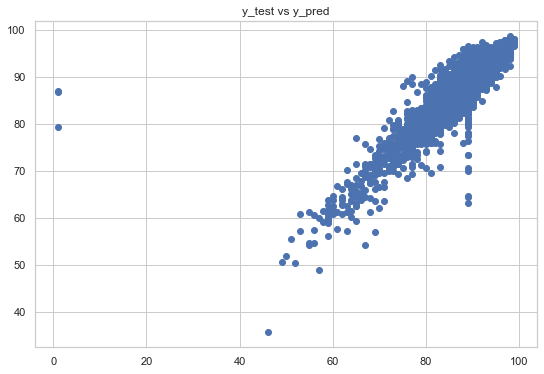

In [82]:
plt.figure(figsize=(9,6))
plt.title("y_test vs y_pred", fontsize=12)
plt.scatter(y_test, y_pred)
plt.show()

In [84]:
data_pr = y_test.copy()
data_pr["predictive"]=y_pred
data_pr["residual"]=data_pr["usr"]-data_pr["predictive"]
data_pr.head()

usr  predictive  residual
3894   95   95.252590 -0.252590
4276   95   94.830537  0.169463
3414   89   90.495571 -1.495571
4165   80   79.370512  0.629488
7385   79   81.698794 -2.698794

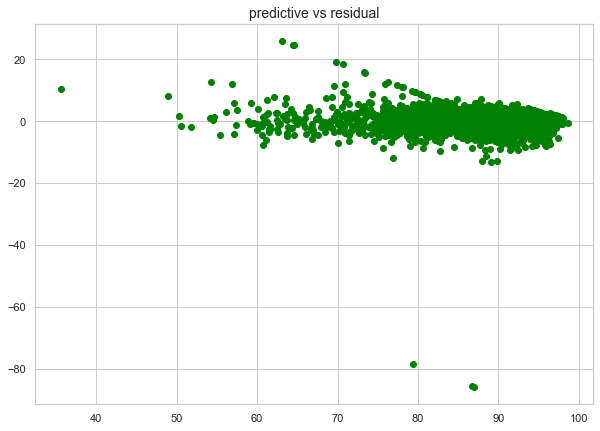

In [86]:
plt.figure(figsize=(10,7))
plt.scatter(data_pr["predictive"],data_pr["residual"], color = "green")
plt.title("predictive vs residual", fontsize=14)
plt.show()

C:\Users\2261092\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


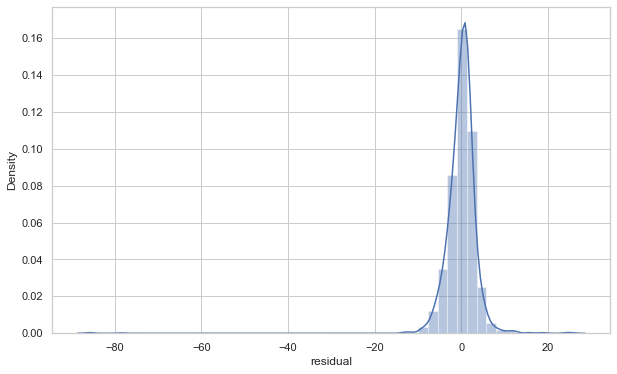

In [87]:
plt.figure(figsize=(10,6))
sns.distplot(data_pr.residual)
plt.show()

In [88]:
for i, j in np.array(model.params.reset_index()):
    print("({}) * {}".format(round(j,4),i),end=" ")

(98.0406) * const (-0.0119) * lread (-0.0024) * lwrite (-0.0014) * scall (0.0006) * sread (-0.0039) * swrite (0.2044) * fork (-0.3242) * exec (-0.0) * rchar (-0.0) * wchar (-0.0139) * pgin (-0.053) * ppgin (-0.0176) * pflt (-0.0155) * vflt (0.0002) * freemem (-0.0) * freeswap (-0.1211) * runqsz_Not_CPU_Bound 

In [ ]:
### Insights
#1. We have encode the variable "runsqz"
#2. Perform train-test split to test the model taking predictor value of column usr.


### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
con=pd.read_excel("C:/Users/2261092/Downloads/Contraceptive_method_dataset.xlsx")

In [3]:
con.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [4]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
print("The dataset have {} number of rows and {} number of columns.".format(con.shape[0],con.shape[1]))

The dataset have 1473 number of rows and 10 number of columns.


In [6]:
print("There are {} duplicated values in dataset.".format(con.duplicated().sum()))

There are 80 duplicated values in dataset.


In [7]:
con.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [8]:
con.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [59]:
con_num = con.select_dtypes(include=["float64", "int64"])

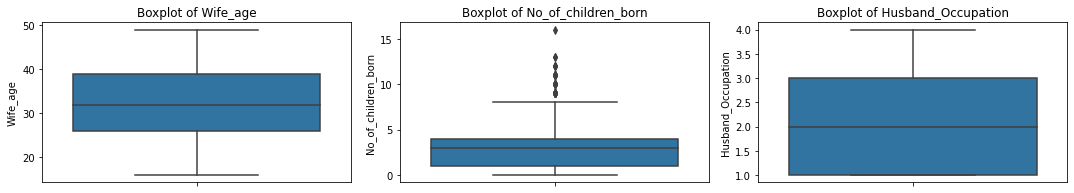

In [9]:
### Checking outliers
plt.figure(figsize=(20,10))
feature_list=con_num.columns
for i in range (len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=con_num[feature_list[i]], data=con_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

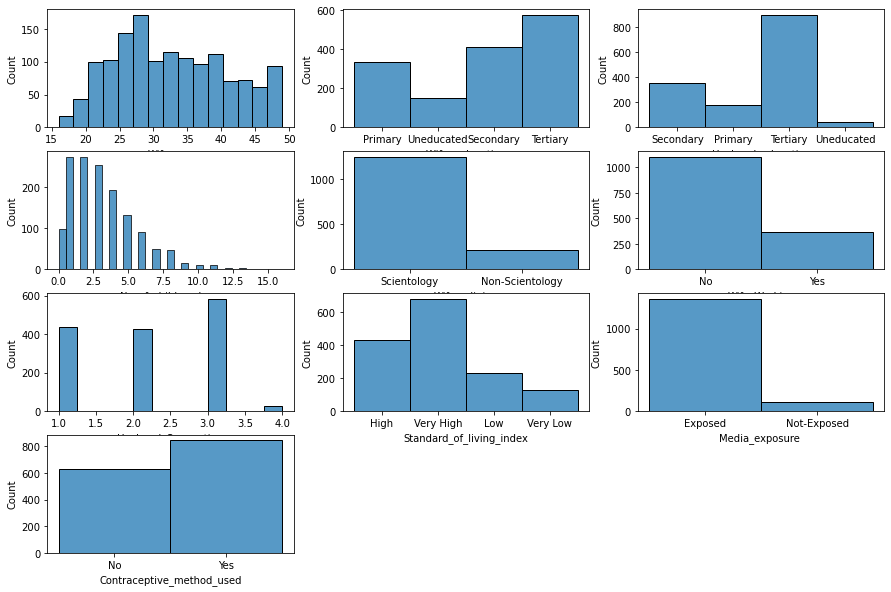

In [10]:
### Univariate analysis
plt.figure(figsize=(15,10))
feature_list=con.columns
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.histplot(con[feature_list[i]])

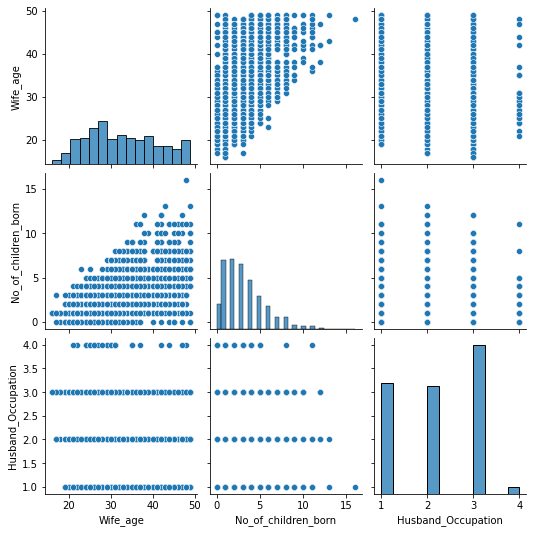

In [11]:
### Bivariate analysis
sns.pairplot(con)

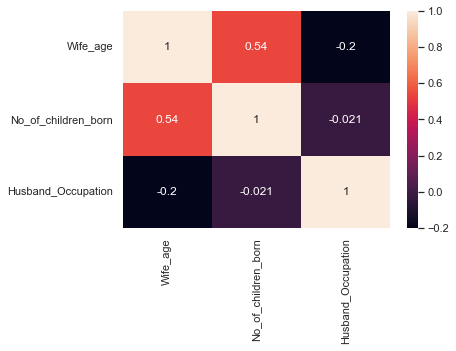

In [83]:
### Multivariate analysis
plt.figure(figsize=(6,4))
sns.heatmap(con.iloc[:,0:10].corr(), annot=True)
plt.show()

In [4]:
### Replacing null values.
con.replace(to_replace = np.nan, value=con.median(), inplace = True)

C:\Users\2261092\AppData\Local\Temp\ipykernel_17984\3215972384.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  con.replace(to_replace = np.nan, value=con.median(), inplace = True)


In [89]:
con.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [5]:
con.drop_duplicates(inplace=True)

In [91]:
print("Duplicate values are {}.".format(con.duplicated().sum()))

Duplicate values are 0.


In [10]:
## Insights:
#1. There are 1473 rows and 10 number of columns.
#2. There are 80 duplicate values in the dataset.
#3. There are outliers present in column - no_of_children_born.
#4. There are null values present in wife_age and no_of children_born column.
#5. There is one integer, two float and seven objects in the dataset.

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [48]:
count_no_sub = len(con[con['Contraceptive_method_used']=='No'])
count_sub = len(con[con['Contraceptive_method_used']=='Yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no contraceptive used is ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of contraceptive used is ", pct_of_sub*100)

percentage of no contraceptive used is  42.701968771215206
percentage of contraceptive used is  57.298031228784794


In [7]:
con.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True) 

In [8]:
con.Wife_education.unique()

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

In [9]:
con["Wife_education"]=np.where(con["Wife_education"] == "Primary", 1, con["Wife_education"])
con["Wife_education"]=np.where(con["Wife_education"] == "Uneducated", 0, con["Wife_education"])
con["Wife_education"]=np.where(con["Wife_education"] == "Secondary", 2, con["Wife_education"])
con["Wife_education"]=np.where(con["Wife_education"] == "Tertiary", 3, con["Wife_education"])

In [10]:
con.Husband_education.unique()

array(['Secondary', 'Primary', 'Tertiary', 'Uneducated'], dtype=object)

In [11]:
con["Husband_education"]=np.where(con["Husband_education"] == "Primary", 1, con["Husband_education"])
con["Husband_education"]=np.where(con["Husband_education"] == "Uneducated", 0, con["Husband_education"])
con["Husband_education"]=np.where(con["Husband_education"] == "Secondary", 2, con["Husband_education"])
con["Husband_education"]=np.where(con["Husband_education"] == "Tertiary", 3, con["Husband_education"])

In [12]:
con.Wife_religion.unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

In [13]:
con["Wife_religion"]  = np.where(con["Wife_religion"] == "Non-Scientology", 0, con["Wife_religion"])
con["Wife_religion"] = np.where(con["Wife_religion"] == "Scientology", 1, con["Wife_religion"])

In [14]:
con.Wife_Working.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
con["Wife_Working"] = np.where(con["Wife_Working"] == "No", 0, con["Wife_Working"])
con["Wife_Working"] = np.where(con["Wife_Working"] == "Yes", 1, con["Wife_Working"])

In [16]:
con.Standard_of_living_index.unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [17]:
con["Standard_of_living_index"] = np.where(con["Standard_of_living_index"] == "Very Low", 0, con["Standard_of_living_index"])
con["Standard_of_living_index"] = np.where(con["Standard_of_living_index"] == "Low", 1, con["Standard_of_living_index"])
con["Standard_of_living_index"] = np.where(con["Standard_of_living_index"] == "High", 2, con["Standard_of_living_index"])
con["Standard_of_living_index"] = np.where(con["Standard_of_living_index"] == "Very High", 3, con["Standard_of_living_index"])

In [18]:
con.rename(columns = {"Media_exposure ":"Media_exposure"}, inplace =True)

In [19]:
con["Media_exposure"] = np.where(con["Media_exposure"] == "Not-Exposed", 0, con["Media_exposure"])
con["Media_exposure"] = np.where(con["Media_exposure"] == "Exposed", 1, con["Media_exposure"])

In [20]:
con["Contraceptive_method_used"]=np.where(con["Contraceptive_method_used"] == "No", 0, con["Contraceptive_method_used"])
con["Contraceptive_method_used"]=np.where(con["Contraceptive_method_used"] == "Yes", 1, con["Contraceptive_method_used"])

In [106]:
con.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
0      24.0               1                  2                  3.0   
1      45.0               0                  2                 10.0   
2      43.0               1                  2                  7.0   
3      42.0               2                  1                  9.0   
4      36.0               2                  2                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         2   
1              1             0                   3                         3   
2              1             0                   3                         3   
3              1             0                   3                         2   
4              1             0                   3                         1   

   Media_exposure  Contraceptive_method_used  
0               1                          0  
1               1                          0  
2               1                          0  
3               1                          0  
4               1                          0

In [28]:
con.describe(include="all").T

count  unique  top    freq       mean       std  \
Wife_age                   1402.0     NaN  NaN     NaN  32.606277  8.274927   
Wife_education             1473.0     4.0  3.0   577.0        NaN       NaN   
Husband_education          1473.0     4.0  3.0   899.0        NaN       NaN   
No_of_children_born        1452.0     NaN  NaN     NaN   3.254132  2.365212   
Wife_religion              1473.0     2.0  1.0  1253.0        NaN       NaN   
Wife_Working               1473.0     2.0  0.0  1104.0        NaN       NaN   
Husband_Occupation         1473.0     NaN  NaN     NaN   2.137814  0.864857   
Standard_of_living_index   1473.0     4.0  3.0   684.0        NaN       NaN   
Media_exposure             1473.0     2.0  1.0  1364.0        NaN       NaN   
Contraceptive_method_used  1473.0     2.0  1.0   844.0        NaN       NaN   

                            min   25%   50%   75%   max  
Wife_age                   16.0  26.0  32.0  39.0  49.0  
Wife_education              NaN   NaN   NaN   NaN   NaN  
Husband_education           NaN   NaN   NaN   NaN   NaN  
No_of_children_born         0.0   1.0   3.0   4.0  16.0  
Wife_religion               NaN   NaN   NaN   NaN   NaN  
Wife_Working                NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index    NaN   NaN   NaN   NaN   NaN  
Media_exposure              NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used   NaN   NaN   NaN   NaN   NaN

In [107]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_education             1388 non-null   int8   
 2   Husband_education          1388 non-null   int8   
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   int8   
 5   Wife_Working               1388 non-null   int8   
 6   Husband_Occupation         1388 non-null   int64  
 7   Standard_of_living_index   1388 non-null   int8   
 8   Media_exposure             1388 non-null   int8   
 9   Contraceptive_method_used  1388 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 52.9 KB


<Figure size 720x576 with 0 Axes>

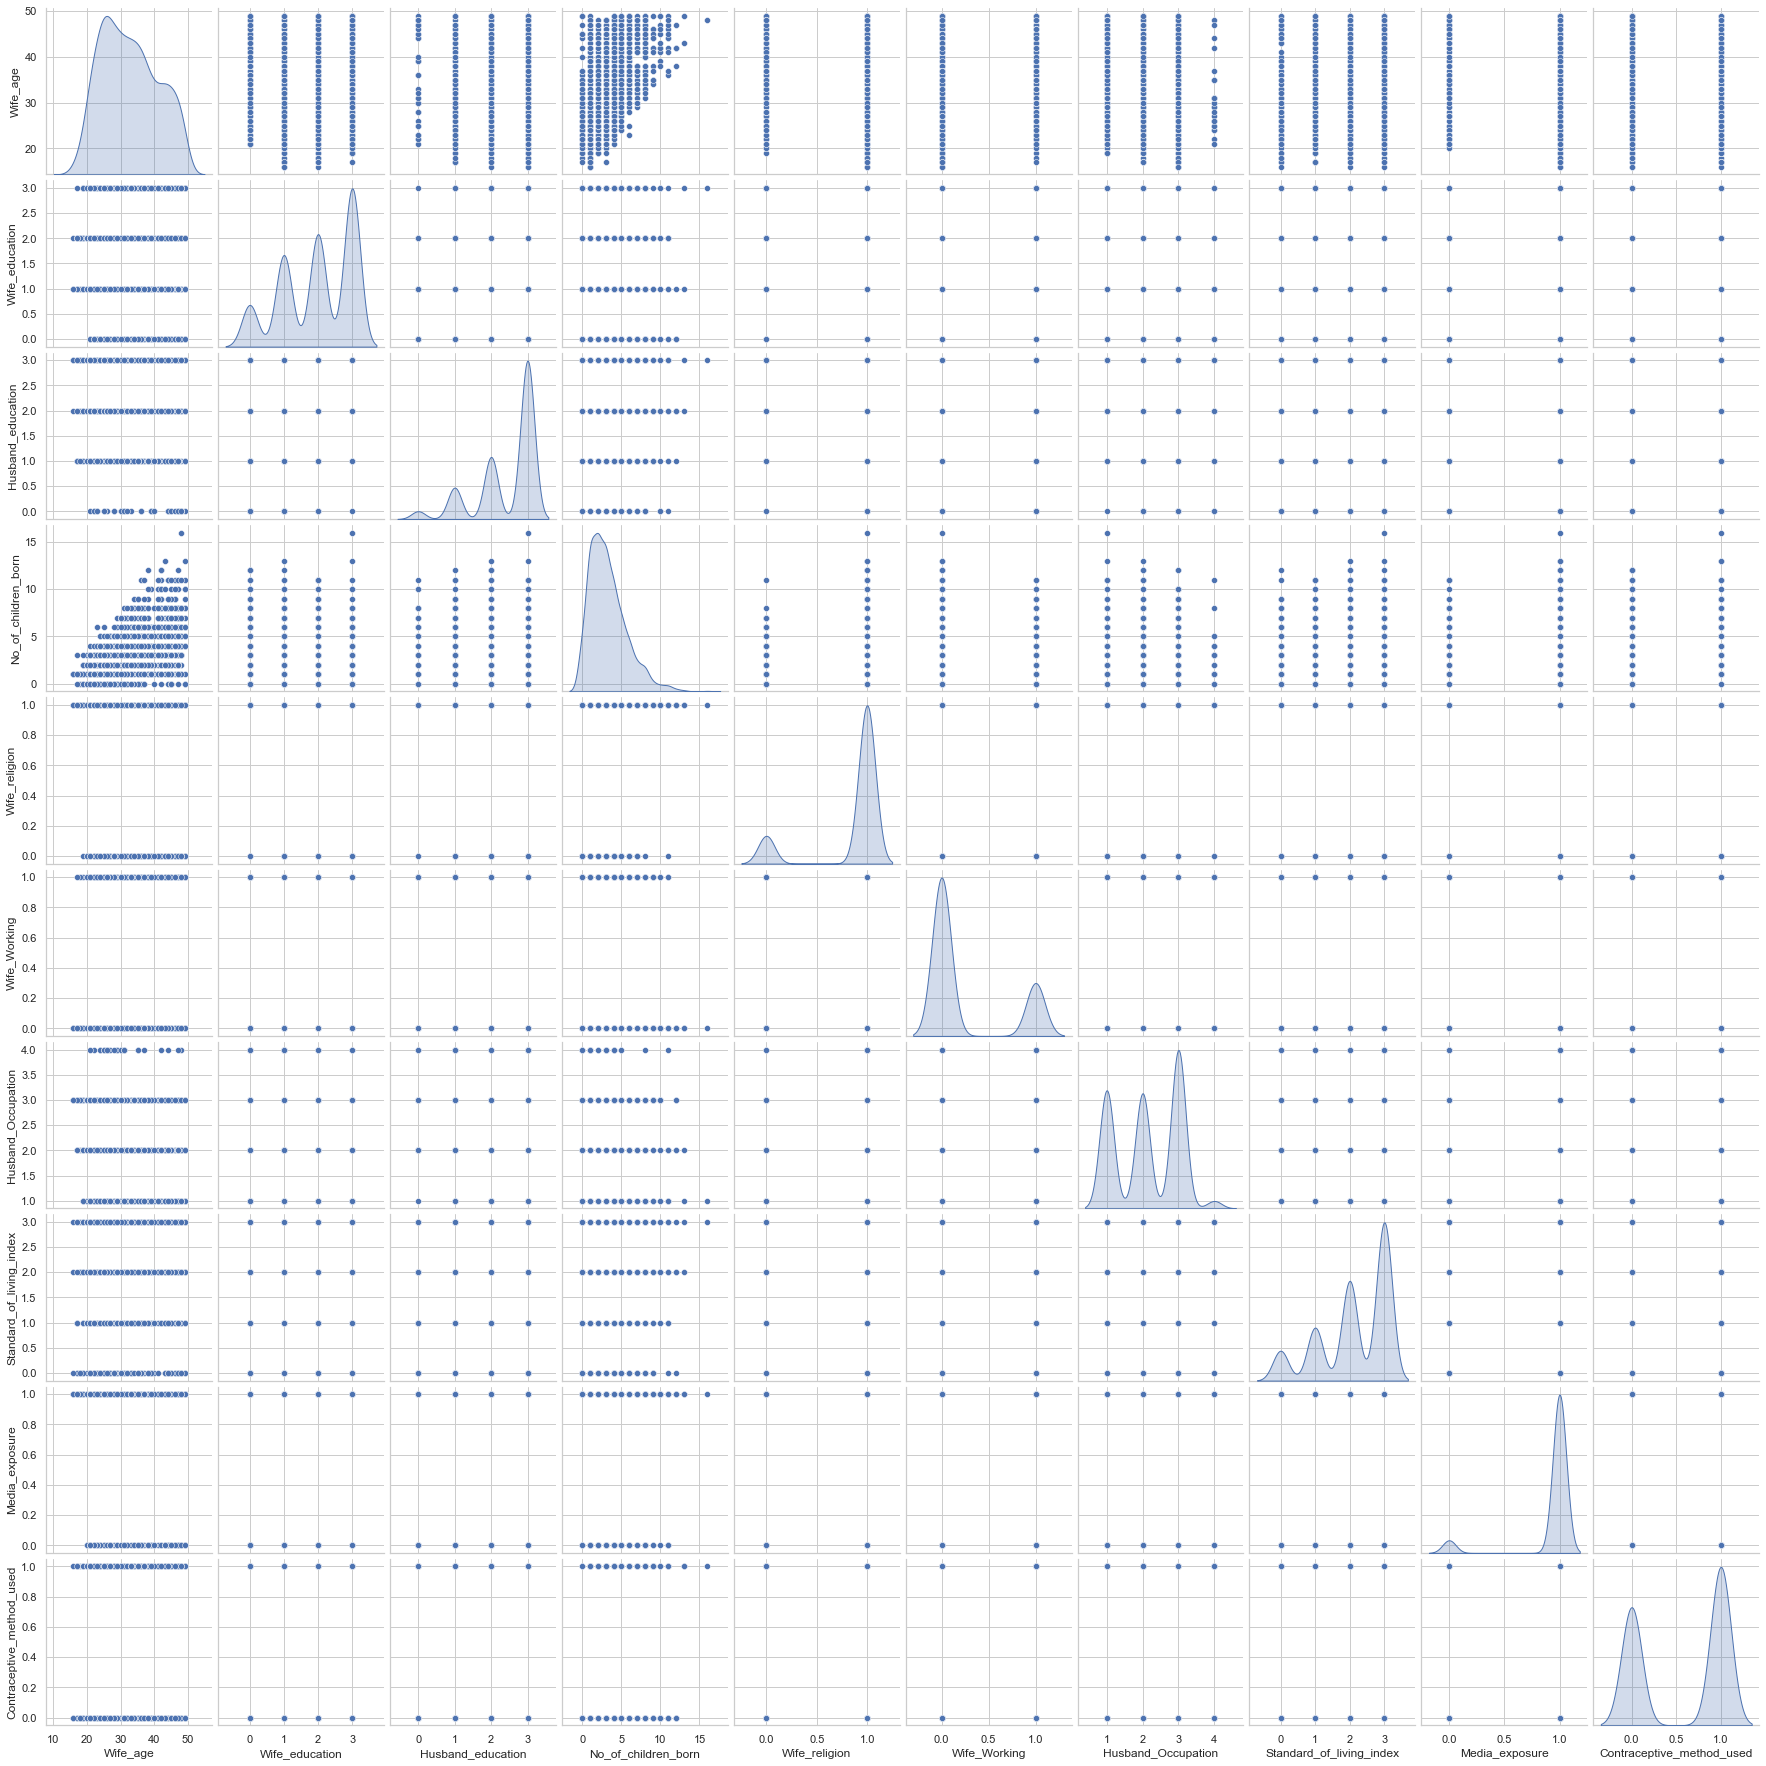

In [81]:
# Bivariate analysis
plt.figure(figsize=(10,8))
sns.pairplot(con, diag_kind="kde")
plt.show()

In [6]:
# convert the object into int datatype
for feature in con.columns:
    if con[feature].dtype == "object":
        con[feature] = pd.Categorical(con[feature]).codes

In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   int8   
 2   Husband_education          1388 non-null   int8   
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   int8   
 5   Wife_Working               1388 non-null   int8   
 6   Husband_Occupation         1388 non-null   int64  
 7   Standard_of_living_index   1388 non-null   int8   
 8   Media_exposure             1388 non-null   int8   
 9   Contraceptive_method_used  1388 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 52.9 KB


In [8]:
# CART
con_1 = con.copy()

In [9]:
X = con_1.drop("Contraceptive_method_used", axis=1)
y = con_1.pop("Contraceptive_method_used")

In [10]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=30, random_state=1)

In [11]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (1358, 9)
X_test (30, 9)
train_labels (1358,)
test_labels (30,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
con_1_model = DecisionTreeClassifier(criterion = "gini")

In [14]:
con_1.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                0                  1                  3.0   
1      45.0                3                  1                 10.0   
2      43.0                0                  1                  7.0   
3      42.0                1                  0                  9.0   
4      36.0                1                  1                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         0   
1              1             0                   3                         2   
2              1             0                   3                         2   
3              1             0                   3                         0   
4              1             0                   3                         1   

   Media_exposure   
0                0  
1                0  
2                0  
3                0  
4                0

In [15]:
con_1_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [17]:
from sklearn import tree

In [19]:
train_char_label = ["0","1"]
credit_tree_file = open("C:/Users/2261092/Downloads/Contraceptive_method_dataset.dot","w")
dot_data = tree.export_graphviz(con_1_model, out_file = credit_tree_file, feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_file

<_io.TextIOWrapper name='C:/Users/2261092/Downloads/Contraceptive_method_dataset.dot' mode='w' encoding='cp1252'>

In [22]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(con_1_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.323742
Wife_ education           0.093350
Husband_education         0.059879
No_of_children_born       0.217454
Wife_religion             0.030811
Wife_Working              0.062365
Husband_Occupation        0.086679
Standard_of_living_index  0.106234
Media_exposure            0.019487


In [23]:
y_predict = con_1_model.predict(X_test)

In [24]:
# Regularize Decision Tree

In [25]:
reg_con_1_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_con_1_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [27]:
credit_tree_regularized = open("C:/Users/2261092/Downloads/Contraceptive_method_dataset.dot",'w')
dot_data = tree.export_graphviz(reg_con_1_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(con_1_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.323742
Wife_ education           0.093350
Husband_education         0.059879
No_of_children_born       0.217454
Wife_religion             0.030811
Wife_Working              0.062365
Husband_Occupation        0.086679
Standard_of_living_index  0.106234
Media_exposure            0.019487


In [29]:
ytrain_predict = reg_con_1_model.predict(X_train)
ytest_predict = reg_con_1_model.predict(X_test)

AUC: 0.805


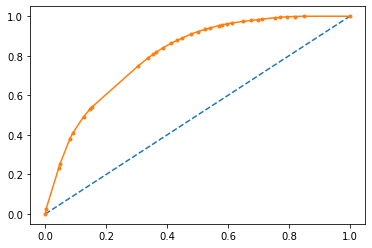

In [31]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_con_1_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.771


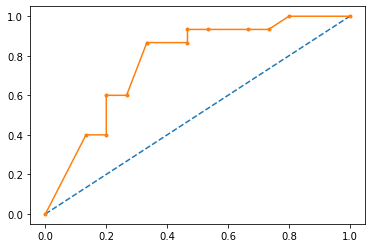

In [33]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_con_1_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       599
           1       0.73      0.86      0.79       759

    accuracy                           0.74      1358
   macro avg       0.75      0.73      0.73      1358
weighted avg       0.75      0.74      0.74      1358



In [36]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.65      0.87      0.74        15

    accuracy                           0.70        30
   macro avg       0.73      0.70      0.69        30
weighted avg       0.72      0.70      0.69        30



In [37]:
confusion_matrix(train_labels, ytrain_predict)

array([[352, 247],
       [104, 655]], dtype=int64)

In [38]:
confusion_matrix(test_labels, ytest_predict)

array([[ 8,  7],
       [ 2, 13]], dtype=int64)

In [40]:
reg_con_1_model.score(X_train,train_labels)

0.7415316642120766

In [41]:
reg_con_1_model.score(X_test,test_labels)

0.7

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [44]:
con_2=con.copy()

In [46]:
LE = LabelEncoder()
LE

LabelEncoder()

In [47]:
con["Contraceptive_method_used"] = LE.fit_transform(con["Contraceptive_method_used"])
con.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                0                  1                  3.0   
1      45.0                3                  1                 10.0   
2      43.0                0                  1                  7.0   
3      42.0                1                  0                  9.0   
4      36.0                1                  1                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         0   
1              1             0                   3                         2   
2              1             0                   3                         2   
3              1             0                   3                         0   
4              1             0                   3                         1   

   Media_exposure   Contraceptive_method_used  
0                0                          0  
1                0                          0  
2                0                          0  
3                0                          0  
4                0                          0

In [48]:
con_dummy = pd.get_dummies(con_2, drop_first=True)
con_dummy

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0         24.0                0                  1                  3.0   
1         45.0                3                  1                 10.0   
2         43.0                0                  1                  7.0   
3         42.0                1                  0                  9.0   
4         36.0                1                  1                  8.0   
...        ...              ...                ...                  ...   
1466      42.0                0                  2                  3.0   
1468      33.0                2                  2                  3.0   
1470      39.0                1                  1                  3.0   
1471      33.0                1                  1                  3.0   
1472      17.0                1                  1                  1.0   

      Wife_religion  Wife_Working  Husband_Occupation  \
0                 1             0                   2   
1                 1             0                   3   
2                 1             0                   3   
3                 1             0                   3   
4                 1             0                   3   
...             ...           ...                 ...   
1466              1             0                   2   
1468              1             1                   2   
1470              1             1                   1   
1471              1             1                   2   
1472              1             0                   2   

      Standard_of_living_index  Media_exposure   Contraceptive_method_used  
0                            0                0                          0  
1                            2                0                          0  
2                            2                0                          0  
3                            0                0                          0  
4                            1                0                          0  
...                        ...              ...                        ...  
1466                         2                0                          1  
1468                         2                0                          1  
1470                         2                0                          1  
1471                         1                0                          1  
1472                         2                0                          1  

[1388 rows x 10 columns]

In [49]:
X = con_dummy.drop("Contraceptive_method_used", axis=1)
y=con_dummy["Contraceptive_method_used"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=con_dummy["Contraceptive_method_used"])

In [52]:
y_train.value_counts()

1    541
0    430
Name: Contraceptive_method_used, dtype: int64

In [53]:
y_test.value_counts()

1    233
0    184
Name: Contraceptive_method_used, dtype: int64

In [54]:
# Logistic Regression model 
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.6282973621103117


In [55]:
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 82 102]
 [ 53 180]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.51       184
           1       0.64      0.77      0.70       233

    accuracy                           0.63       417
   macro avg       0.62      0.61      0.61       417
weighted avg       0.62      0.63      0.62       417



C:\Users\2261092\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


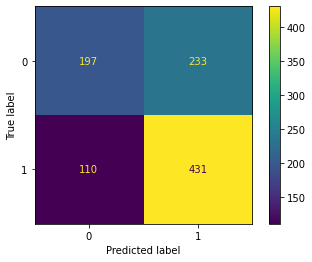

In [60]:
plot_confusion_matrix(model, X_train, y_train)

In [56]:
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[197 233]
 [110 431]]
              precision    recall  f1-score   support

           0       0.64      0.46      0.53       430
           1       0.65      0.80      0.72       541

    accuracy                           0.65       971
   macro avg       0.65      0.63      0.62       971
weighted avg       0.65      0.65      0.64       971



C:\Users\2261092\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


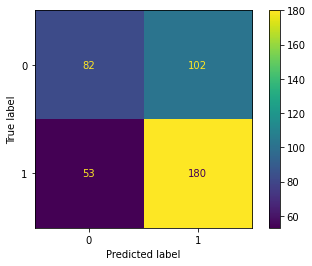

In [61]:
plot_confusion_matrix(model, X_test, y_test)

AUC: 0.681


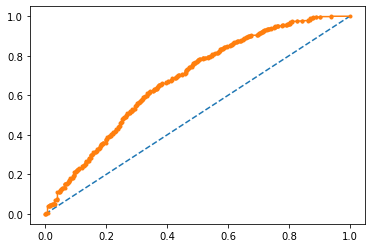

In [57]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.622


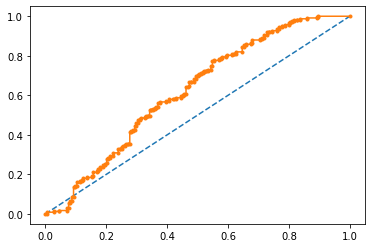

In [58]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.')
# show the plot
plt.show()

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
## LDA
con_3 = con.copy()

In [70]:
X = con_3.drop("Contraceptive_method_used", axis=1)
y = con_3["Contraceptive_method_used"]

In [71]:
from sklearn import metrics, model_selection

In [72]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=.30, random_state=1,stratify=con_3["Contraceptive_method_used"])

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(971, 9)
(417, 9)
(971,)
(417,)


In [74]:
#LDA model
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train, y_train)
model

LinearDiscriminantAnalysis()

In [75]:
#intercept value
clf.intercept_

array([1.73389809])

In [76]:
#coefficient 
clf.coef_

array([[-0.07543069,  0.17151368,  0.31472774,  0.29135608, -0.77015773,
        -0.11392195,  0.02230666,  0.02180963, -1.10457521]])

In [77]:
X_train.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [79]:
#train class prediction
pred_class_train = model.predict(X_train)

#test class prediction
pred_class_test = model.predict(X_test)

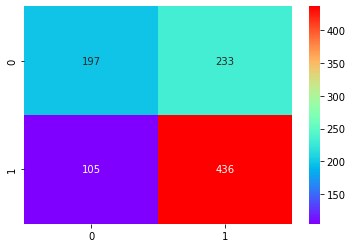

In [92]:
# training data and test data confusion matrix comparison
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_class_train)), annot=True, fmt=".5g", cmap="rainbow")

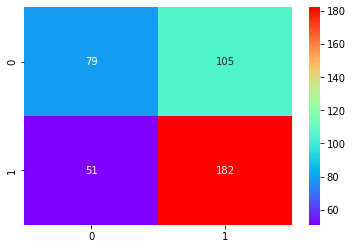

In [95]:
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_class_test)), annot=True, fmt=".5g", cmap="rainbow")

C:\Users\2261092\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.46      0.53       430
           1       0.65      0.80      0.72       541

    accuracy                           0.65       971
   macro avg       0.65      0.63      0.62       971
weighted avg       0.65      0.65      0.64       971
 



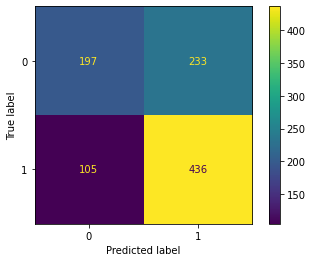

In [100]:
from sklearn.metrics import classification_report
plot_confusion_matrix(model,X_train, y_train)
print(classification_report(y_train,ytrain_predict), "\n")

C:\Users\2261092\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.61      0.45      0.51       184
           1       0.64      0.77      0.70       233

    accuracy                           0.63       417
   macro avg       0.62      0.61      0.61       417
weighted avg       0.62      0.63      0.62       417
 



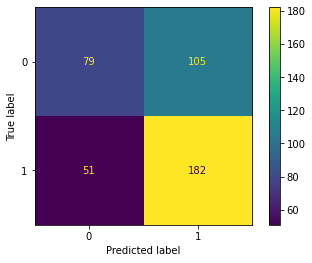

In [101]:
plot_confusion_matrix(model,X_test, y_test)
print(classification_report(y_test,ytest_predict), "\n")

In [102]:
# probability prediction of the training and test data
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [103]:
pred_prob_train[:,1]

array([0.5373718 , 0.484968  , 0.51898841, 0.49697988, 0.4413578 ,
       0.46278282, 0.68946595, 0.79959051, 0.41413546, 0.66337269,
       0.57246503, 0.52137806, 0.72294102, 0.66331182, 0.63328266,
       0.5514582 , 0.54101836, 0.64887299, 0.64829914, 0.66744643,
       0.59059957, 0.4307276 , 0.36232519, 0.56966235, 0.82263687,
       0.73422797, 0.80510573, 0.7417684 , 0.2090702 , 0.66057135,
       0.65140857, 0.60054534, 0.73589109, 0.62368119, 0.39233817,
       0.7291768 , 0.84401425, 0.29750645, 0.38215013, 0.56917988,
       0.2026319 , 0.67028197, 0.66325905, 0.20155478, 0.44772132,
       0.55552049, 0.66234472, 0.69866979, 0.55743595, 0.49140403,
       0.55013261, 0.63223217, 0.47533226, 0.56485667, 0.6584264 ,
       0.63148138, 0.22798198, 0.67050163, 0.39226344, 0.58995632,
       0.77386326, 0.45401904, 0.49116153, 0.60625992, 0.8477271 ,
       0.51175397, 0.35296731, 0.65698359, 0.63636397, 0.38593059,
       0.47289448, 0.56230691, 0.58510945, 0.57885713, 0.42501

AUC for the training data: 0.681
AUC for the test data: 0.622


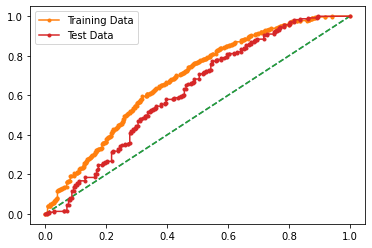

In [107]:
# cal auc
#AUC and ROC for the test data
auc = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print("AUC for the training data: %.3f" %auc)

fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr, tpr, marker = ".", label = "Training Data")

#AUC and ROC for the test data
#calculate AUC
auc = metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print("AUC for the test data: %.3f" %auc)


fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr, tpr, marker = ".", label = "Test Data")
plt.legend(loc="best")
plt.show()